In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("merchant_fill_nonulls.csv", index_col = 0)
df.sample(3)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
797,Women's Fashion Summer Sexy Slimn Fit Denim Sh...,11.0,152,1000,No,3.91,808,No,Buena,No,"Summer,Shorts,Waist,Women jeans,Denim,Slim Fit...",blue,XS,Livraison standard,2,No,43,50,CN,aqlangweigarmentstradingcoltd,83 % avis positifs,87178,5440e3d7f8abc82cbd97b19c,https://www.wish.com/c/5af40bb2f281cb017ec17012,5af40bb2f281cb017ec17012,2,2000,1000.0,3.908,87178.0,11.00,152.00,808.0,-92.76,Regular,180.0,110.0,68.0,69.0,381.0
1327,Summer Print Dress Women's Round Neck Short Sl...,2.0,2,100,Si,2.44,9,No,Buena,No,"Summer,Plus Size,Necks,Sleeve,Vintage,Dress,sh...",armygreen,XXXS,Livraison standard,1,No,42,50,CN,lionmouse,85 % avis positifs,26951,58da49c92c3a8f52a755d4a0,https://www.wish.com/c/5eb63e65f98a3634f4d430b3,5eb63e65f98a3634f4d430b3,2,200,100.0,4.035,26951.0,2.00,2.00,9.0,0.00,Buena,2.0,0.0,3.0,3.0,1.0
736,S-5XL Nouvelle Arrivée Femmes Mode Blouse T-sh...,8.0,8,1000,No,4.06,121,No,Buena,No,"blouse,Summer,Shorts,Cotton,Shirt,letter print...",pink,S,Livraison standard,3,No,42,50,CN,longlongchenchen,85 % avis positifs,3300,5ae29b4e1baafe7c0109c5ae,https://www.wish.com/c/5cfa0a9de936495950c04101,5cfa0a9de936495950c04101,3,2100,700.0,4.024,3300.0,7.67,25.33,151.0,0.00,Buena,28.0,16.0,10.0,6.0,61.0


# Ejercicios

1. La variable price representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

In [4]:
media_price = df['price'].mean()
print(f"La media de precio de los productos es: {np.round(media_price, 2)}")

mediana_price = df['price'].median()
print(f"La mediana de precio de los productos es: {np.round(mediana_price, 2)}")

La media de precio de los productos es: 8.33
La mediana de precio de los productos es: 8.0


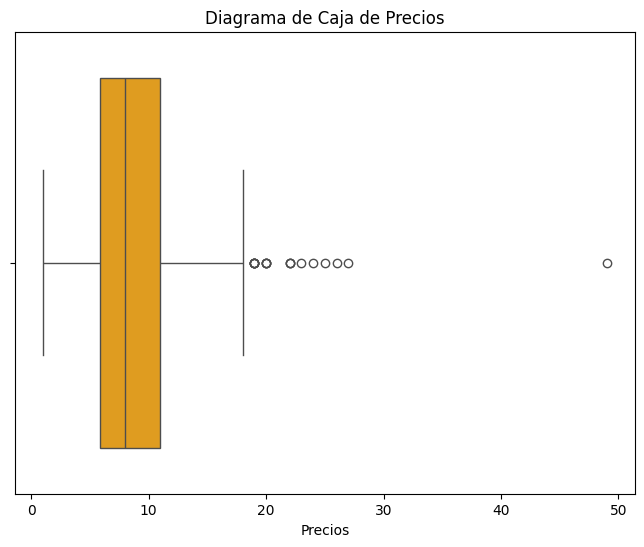

In [5]:
# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando el método boxplot visualizamos la mediana, cambiamos el color del boxplot
sns.boxplot(x='price', 
            data=df, 
            color='orange')

# cambiamos el nombre del eje x
plt.xlabel('Precios')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Precios');

In [ ]:
#La **MEDIA** es el promedio de todos los precios y puede verse afectada por valores extremos, mientras que la **MEDIANA** es el valor que se encuentra justo en el medio cuando los precios se ordenan, y no se ve influenciada por valores extremos. 
# Ambas medidas son importantes para entender la distribución de los PRECIOS de los productos.

2. Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

In [6]:
from itertools import combinations

# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_sold'),
 ('price', 'rating_count'),
 ('price', 'shipping_option_price'),
 ('price', 'countries_shipped_to'),
 ('price', 'inventory_total'),
 ('price', 'merchant_rating_count'),
 ('price', 'listed_products'),
 ('price', 'total_units_sold'),
 ('price', 'mean_units_sold_per_product'),
 ('price', 'rating_employee'),
 ('price', 'merchant_ratings_count'),
 ('price', 'mean_product_prices'),
 ('price', 'mean_retail_prices'),
 ('price', 'mean_product_ratings_count'),
 ('price', 'discount_percentage'),
 ('price', 'rating_four_count'),
 ('price', 'rating_three_count'),
 ('price', 'rating_two_count'),
 ('price', 'rating_one_count'),
 ('price', 'rating_five_count'),
 ('retail_price', 'units_sold'),
 ('retail_price', 'rating_sold'),
 ('retail_price', 'rating_count'),
 ('retail_price', 'shipping_option_price'),
 ('retail_price', 'countries_shipped_to'),
 ('retail_price', 'inventory_total'),
 ('retail_price', 'merchant_rating_cou

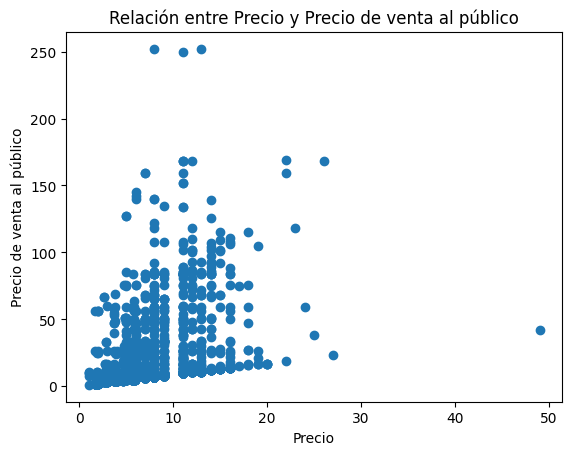

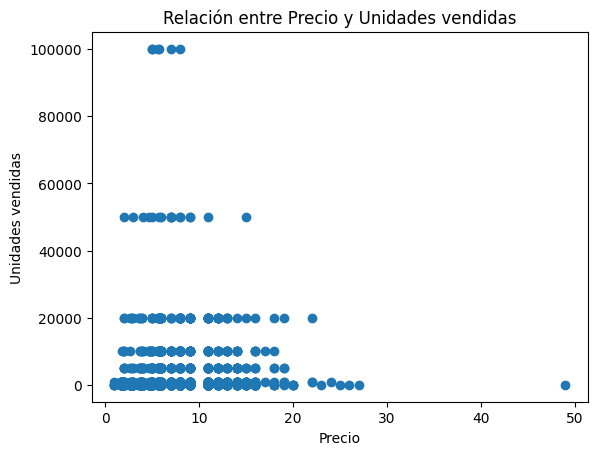

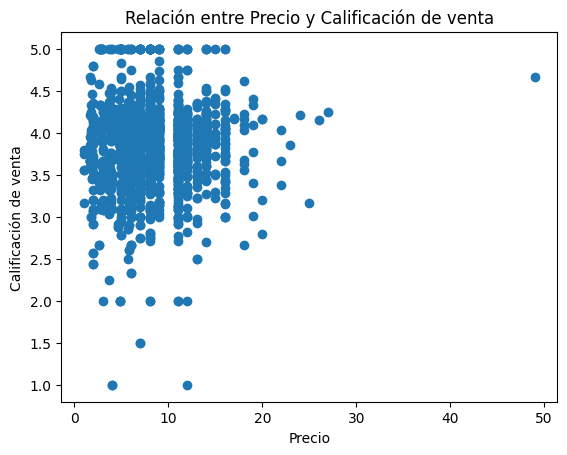

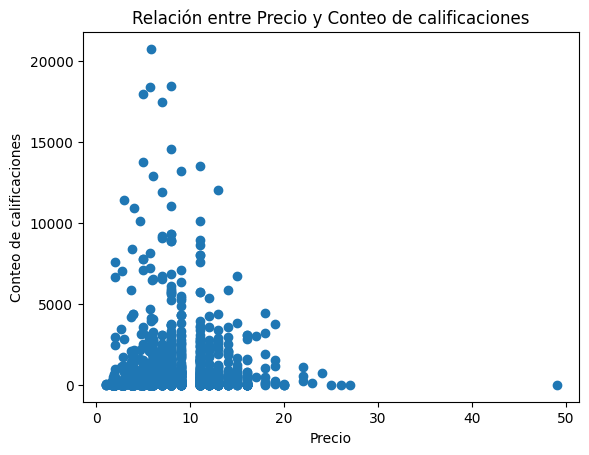

In [10]:
## Identificar el tipo de relación entre las variables
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
    
# Crear un gráfico de dispersión para cada una de las combinaciones de variables
plt.scatter(df["price"], df["retail_price"])
plt.xlabel("Precio")
plt.ylabel("Precio de venta al público")
plt.title("Relación entre Precio y Precio de venta al público")
plt.show()

plt.scatter(df["price"], df["units_sold"])
plt.xlabel("Precio")
plt.ylabel("Unidades vendidas")
plt.title("Relación entre Precio y Unidades vendidas")
plt.show()

plt.scatter(df["price"], df["rating_sold"])
plt.xlabel("Precio")
plt.ylabel("Calificación de venta")
plt.title("Relación entre Precio y Calificación de venta")
plt.show()

plt.scatter(df["price"], df["rating_count"])
plt.xlabel("Precio")
plt.ylabel("Conteo de calificaciones")
plt.title("Relación entre Precio y Conteo de calificaciones")
plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1573 entries, 0 to 1572
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   units_sold                   1573 non-null   int64  
 4   uses_ad_boosts               1573 non-null   object 
 5   rating_sold                  1573 non-null   float64
 6   rating_count                 1573 non-null   int64  
 7   badge_local_product          1573 non-null   object 
 8   badge_product_quality        1573 non-null   object 
 9   badge_fast_shipping          1573 non-null   object 
 10  tags                         1573 non-null   object 
 11  product_color                1573 non-null   object 
 12  product_variation_size_id    1573 non-null   object 
 13  shipping_option_name   

In [13]:
df_correlaciones = df.corr(method="spearman", min_periods=1, numeric_only=True)
df_correlaciones

,price,retail_price,units_sold,rating_sold,rating_count,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
price,1.000000,0.536104,0.061769,0.055564,0.129345,0.859152,-0.016446,-0.062895,0.000385,-0.129033,-0.050126,0.006612,0.055174,0.000385,0.882704,0.453215,0.065397,0.129116,0.129464,0.113892,0.105915,0.116479,0.129430
retail_price,0.536104,1.000000,-0.027991,0.043173,0.024439,0.458731,0.124274,-0.046901,0.013592,-0.170829,-0.118256,-0.053186,0.032367,0.013592,0.506670,0.914495,-0.007313,-0.675246,0.042979,0.029936,0.033661,0.019197,0.043657
units_sold,0.061769,-0.027991,1.000000,0.026794,0.941988,0.066510,0.058934,0.058762,0.467947,0.007856,0.743758,0.854540,0.215589,0.467947,0.034262,-0.025763,0.821012,0.091436,0.841298,0.849927,0.834474,0.833819,0.848140
rating_sold,0.055564,0.043173,0.026794,1.000000,0.046749,0.069522,0.072435,-0.029712,0.052310,-0.094178,-0.004688,0.028503,0.253510,0.052310,0.051745,0.050278,0.044784,-0.017446,0.196560,0.105787,0.038059,-0.036727,0.268168
rating_count,0.129345,0.024439,0.941988,0.046749,1.000000,0.130921,0.056153,0.052848,0.470281,-0.026791,0.690538,0.807655,0.244870,0.470281,0.102488,0.024491,0.855074,0.081600,0.893646,0.891046,0.875202,0.869495,0.896480
shipping_option_price,0.859152,0.458731,0.066510,0.069522,0.130921,1.000000,-0.012647,-0.059761,0.021646,-0.127743,-0.029481,0.030758,0.059602,0.021646,0.762732,0.404595,0.081886,0.125062,0.141742,0.126799,0.117662,0.129449,0.141471
countries_shipped_to,-0.016446,0.124274,0.058934,0.072435,0.056153,-0.012647,1.000000,-0.029577,0.206918,-0.015335,0.067764,0.075738,0.158419,0.206918,-0.015715,0.166046,0.069599,-0.158177,0.064113,0.059956,0.053646,0.028971,0.066870
inventory_total,-0.062895,-0.046901,0.058762,-0.029712,0.052848,-0.059761,-0.029577,1.000000,0.018107,0.086190,0.088131,0.068210,-0.079420,0.018107,-0.064300,-0.045094,0.064528,-0.004447,0.057947,0.067969,0.062350,0.064416,0.055552
merchant_rating_count,0.000385,0.013592,0.467947,0.052310,0.470281,0.021646,0.206918,0.018107,1.000000,0.282848,0.635576,0.598192,0.251161,1.000000,0.006601,0.059850,0.615972,-0.020919,0.442943,0.443660,0.415077,0.416399,0.440822
listed_products,-0.129033,-0.170829,0.007856,-0.094178,-0.026791,-0.127743,-0.015335,0.086190,0.282848,1.000000,0.509894,0.158998,-0.152354,0.282848,-0.129337,-0.114864,0.136660,0.088786,-0.030774,-0.014926,-0.017040,-0.013238,-0.037889


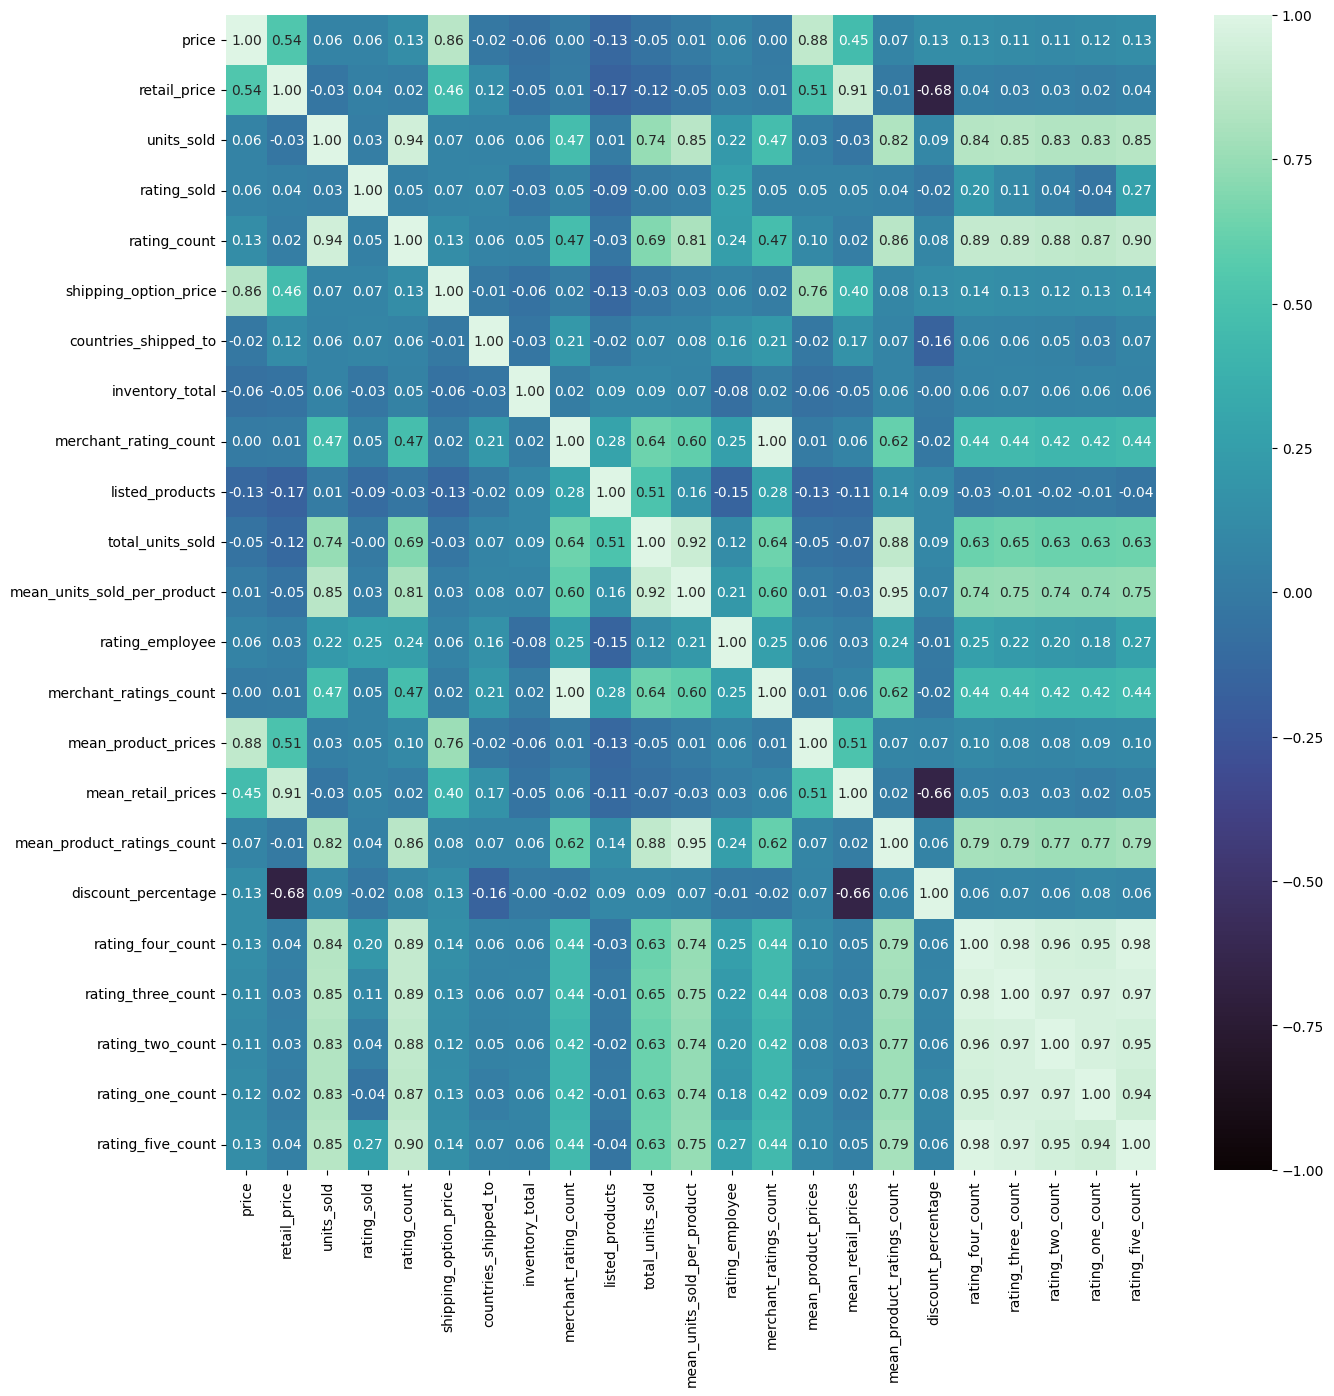

In [14]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

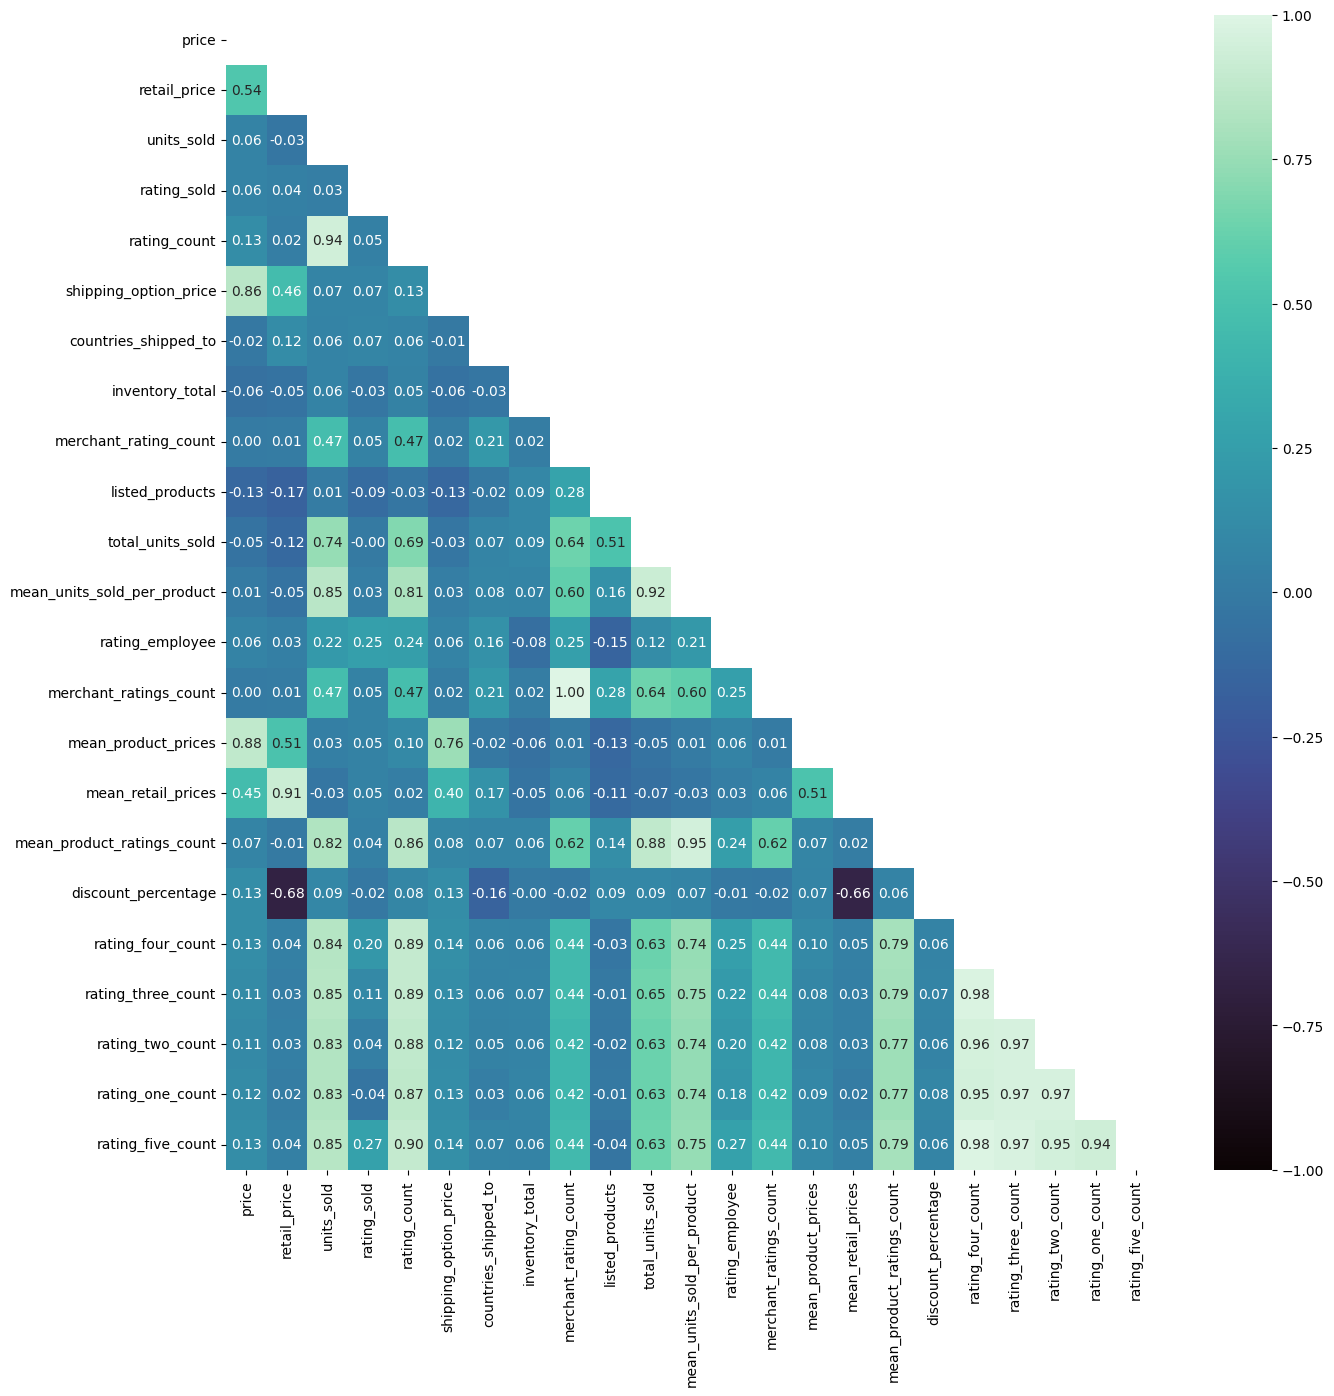

In [15]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

In [29]:
# Asumiendo que df tiene 'uses_ad_boosts' y 'badge_product_quality'
tabla_contingencia = pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'], normalize=True) * 100

# Reestructurar tabla_contingencia
tabla_contingencia_melted = tabla_contingencia.reset_index().melt(
    id_vars='uses_ad_boosts',
    var_name='badge_product_quality',
    value_name='percentage'
)
tabla_contingencia_melted

,uses_ad_boosts,badge_product_quality,percentage
0,No,Buena,52.511125
1,Si,Buena,40.050858
2,No,Excelente,4.195804
3,Si,Excelente,3.242212


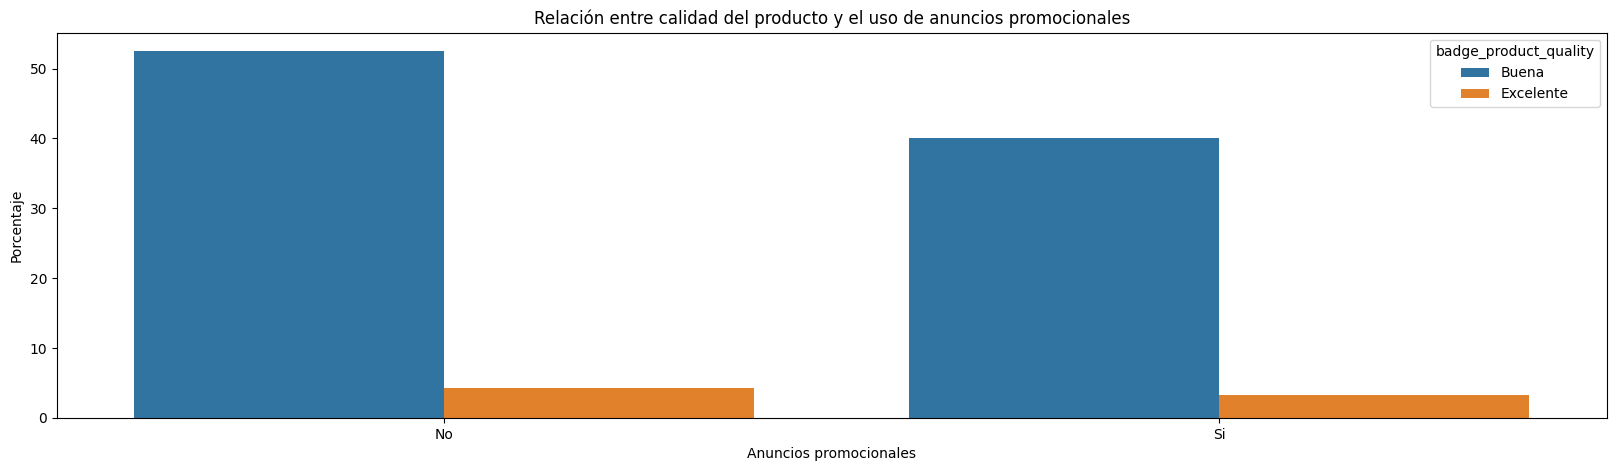

In [30]:
fig, axes = plt.subplots(figsize=(20, 5))

# Gráfico de barras para la frecuencia relativa
sns.barplot(x='uses_ad_boosts', y='percentage', hue='badge_product_quality', data=tabla_contingencia_melted)

plt.xlabel('Anuncios promocionales')
plt.ylabel('Porcentaje')
plt.title('Relación entre calidad del producto y el uso de anuncios promocionales')
plt.show()

4. Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y badge_fast_shipping. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

In [31]:
# Asumiendo que df tiene 'uses_ad_boosts' y 'badge_product_quality'
tabla_contingencia2 = pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'], normalize=True) * 100

# Reestructurar tabla_contingencia
tabla_contingencia_melted2 = tabla_contingencia2.reset_index().melt(
    id_vars='badge_local_product',
    var_name='badge_fast_shipping',
    value_name='percentage'
)
tabla_contingencia_melted2

,badge_local_product,badge_fast_shipping,percentage
0,No,No,97.457088
1,Si,No,1.271456
2,No,Si,0.699301
3,Si,Si,0.572155


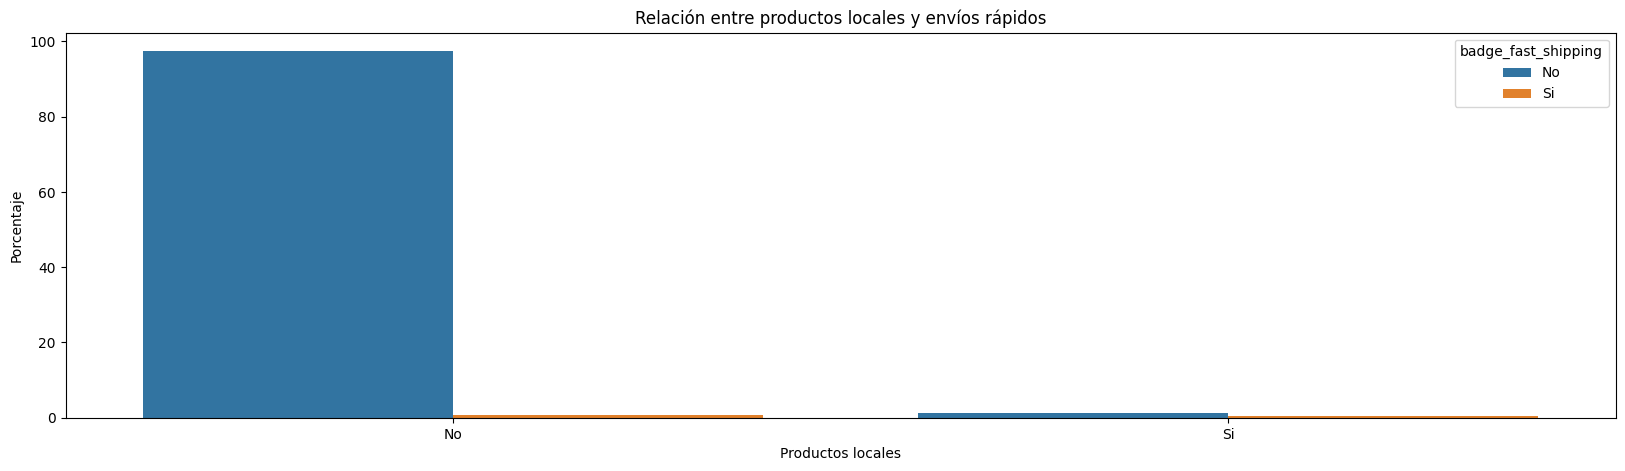

In [33]:
fig, axes = plt.subplots(figsize=(20, 5))

# Gráfico de barras para la frecuencia relativa
sns.barplot(x='badge_local_product', y='percentage', hue='badge_fast_shipping', data=tabla_contingencia_melted2)

plt.xlabel('Productos locales')
plt.ylabel('Porcentaje')
plt.title('Relación entre productos locales y envíos rápidos')
plt.show()

5. Calcula la media y la mediana de la variable mean_product_prices. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

In [34]:
media_mean_product_prices = df['mean_product_prices'].mean()
print(f"La media de los precios promedio de los productos es: {np.round(media_mean_product_prices, 2)}")

mediana_mean_product_prices = df['mean_product_prices'].median()
print(f"La mediana de los precios promedio de los productos es: {np.round(mediana_mean_product_prices, 2)}")

La media de los precios promedio de los productos es: 8.33
La mediana de los precios promedio de los productos es: 8.0


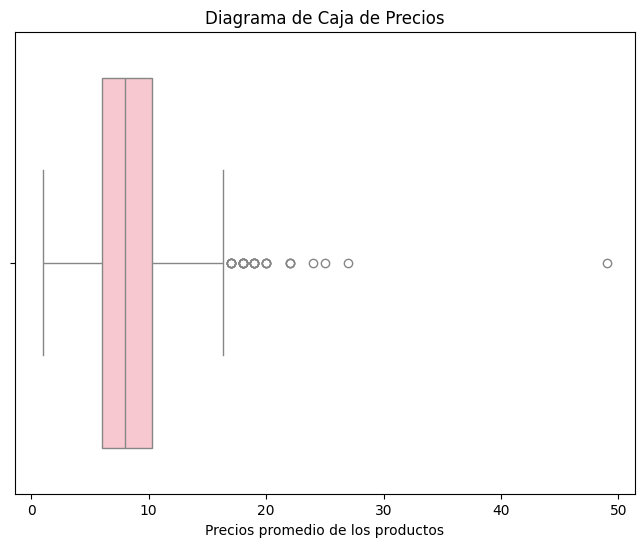

In [35]:
# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando el método boxplot visualizamos la mediana, cambiamos el color del boxplot
sns.boxplot(x='mean_product_prices', 
            data=df, 
            color='pink')

# cambiamos el nombre del eje x
plt.xlabel('Precios promedio de los productos')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Precios');

6. Realiza un análisis de correlación entre total_units_sold y mean_product_ratings_count. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

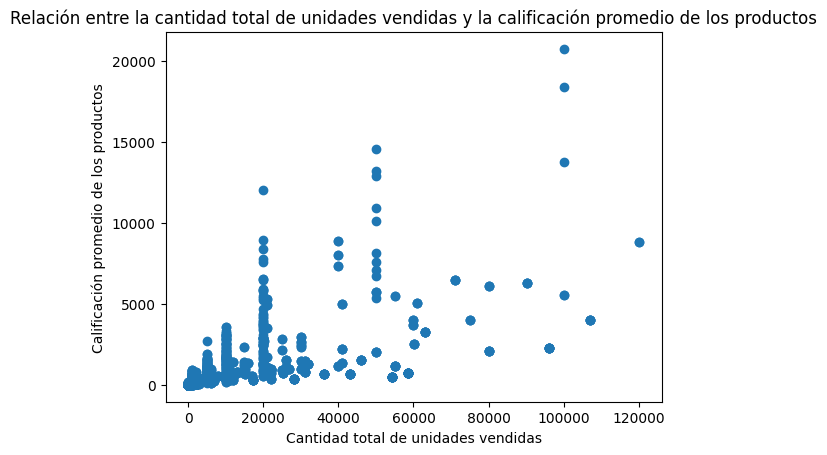

In [36]:
# Crear un gráfico de dispersión para cada una de las combinaciones de variables
plt.scatter(df["total_units_sold"], df["mean_product_ratings_count"])
plt.xlabel("Cantidad total de unidades vendidas")
plt.ylabel("Calificación promedio de los productos")
plt.title("Relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos")
plt.show()

In [39]:
df_corr=df[["total_units_sold","mean_product_ratings_count"]]
df_corr

,total_units_sold,mean_product_ratings_count
0,100,54.0
1,21400,1057.0
2,21400,1057.0
3,21400,1057.0
4,21400,1057.0
...,...,...
1568,10000,2901.0
1569,5000,774.0
1570,1000,62.0
1571,100,59.0


In [41]:
df_correlaciones2 = df_corr.corr(method="spearman", min_periods=1, numeric_only=True)
df_correlaciones2

,total_units_sold,mean_product_ratings_count
total_units_sold,1.000000,0.875353
mean_product_ratings_count,0.875353,1.000000


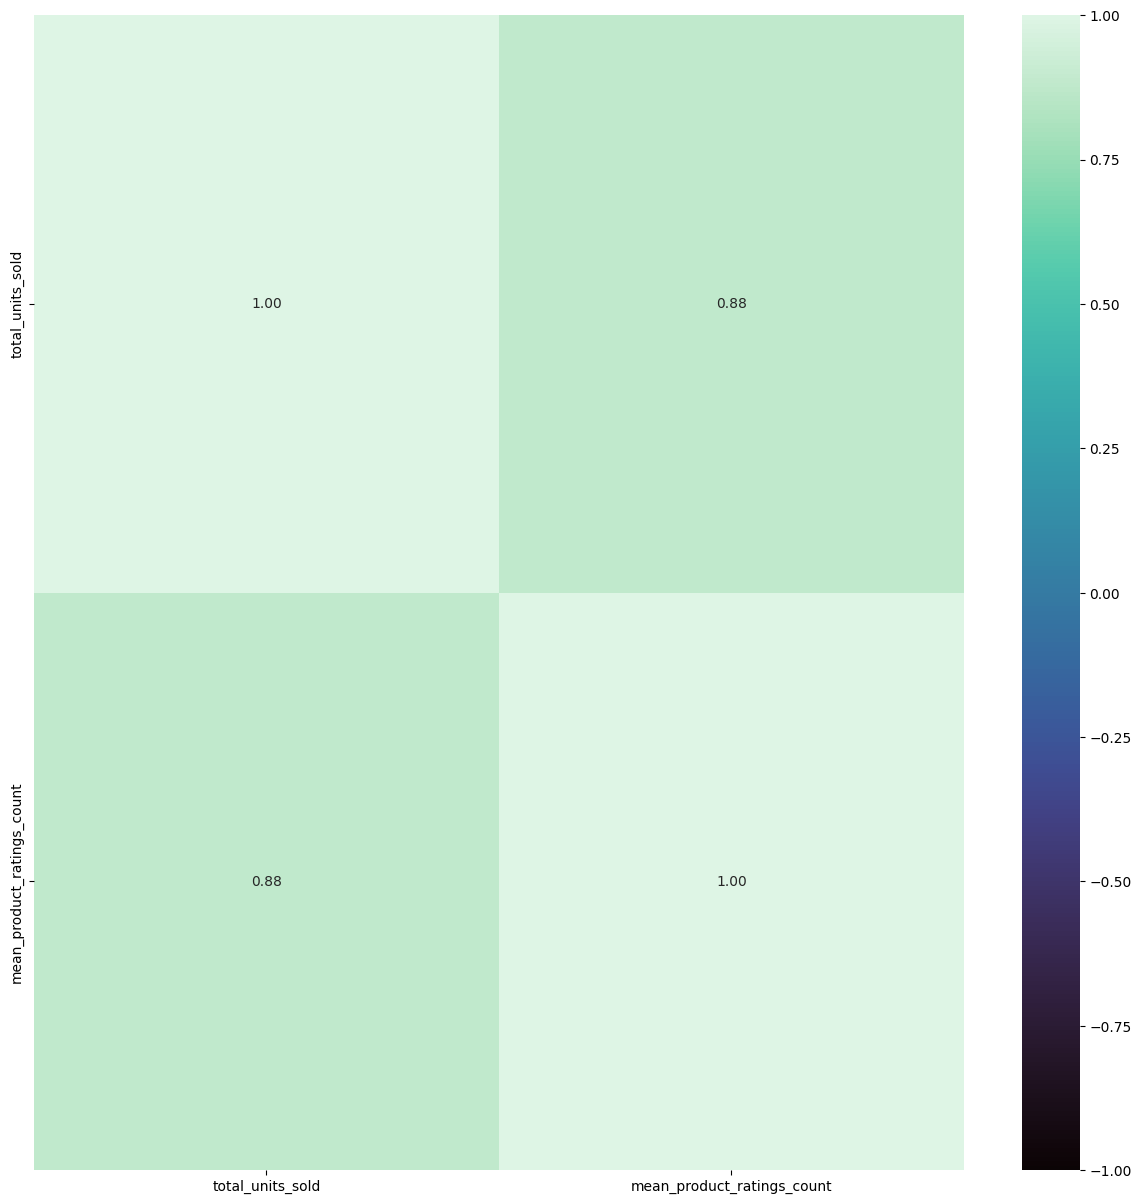

In [42]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones2, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

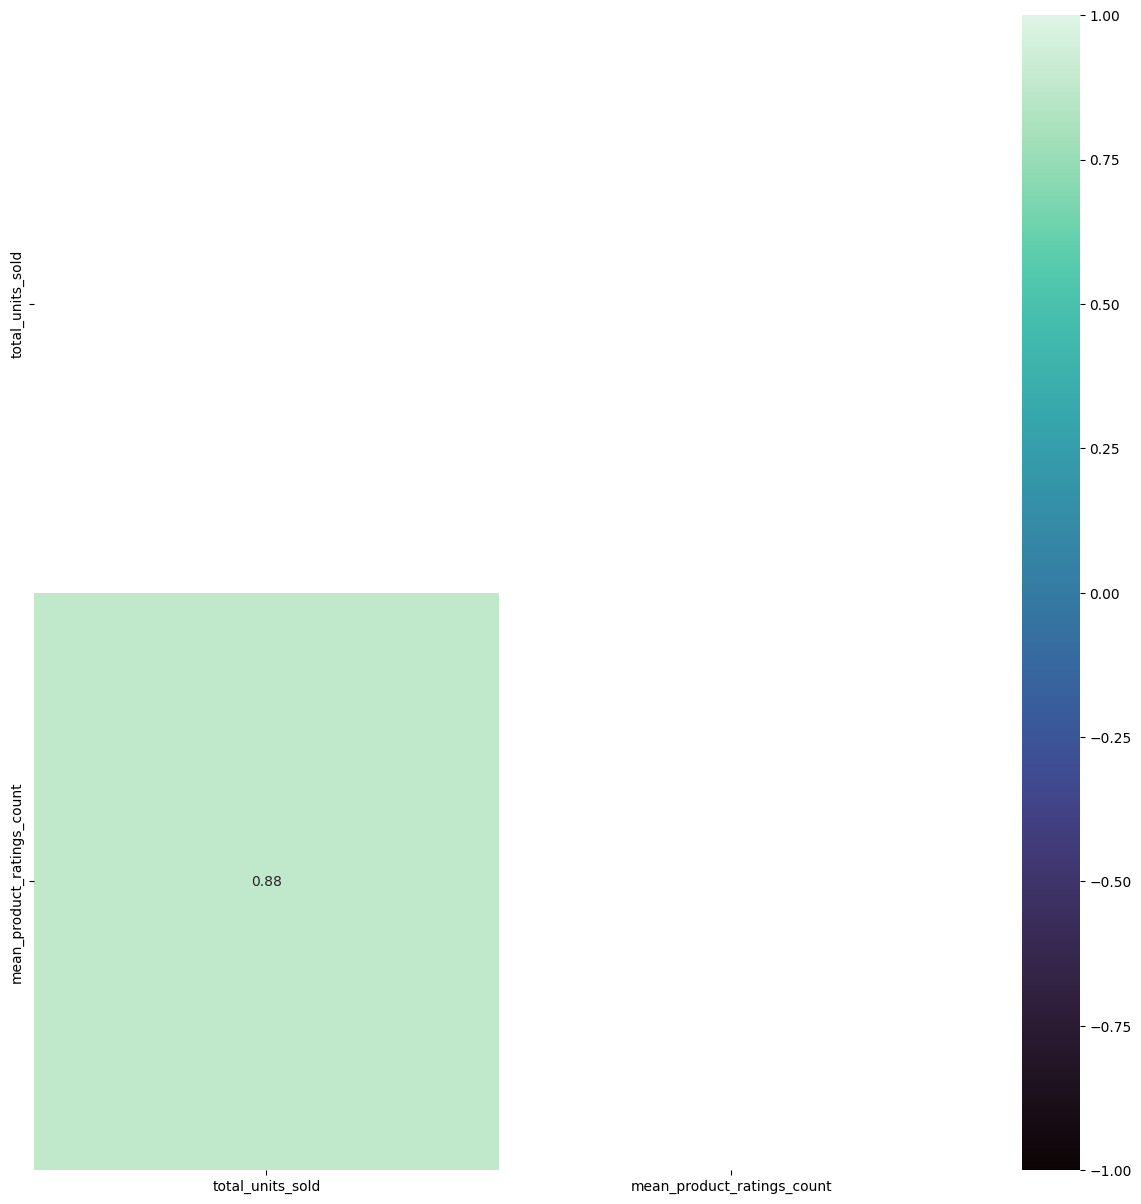

In [43]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones2, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


7. Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y seller_reputation. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

In [53]:
tabla_contingencia3 = pd.crosstab(df["badge_local_product"], df["seller_reputation"], normalize=True) * 100

# Reestructurar tabla_contingencia
tabla_contingencia_melted3 = tabla_contingencia3.reset_index().melt(
    id_vars="badge_local_product",
    var_name="seller_reputation",
    value_name='percentage'
)
tabla_contingencia_melted3

,badge_local_product,seller_reputation,percentage
0,No,Buena,57.469803
1,Si,Buena,1.716465
2,No,Regular,40.686586
3,Si,Regular,0.127146


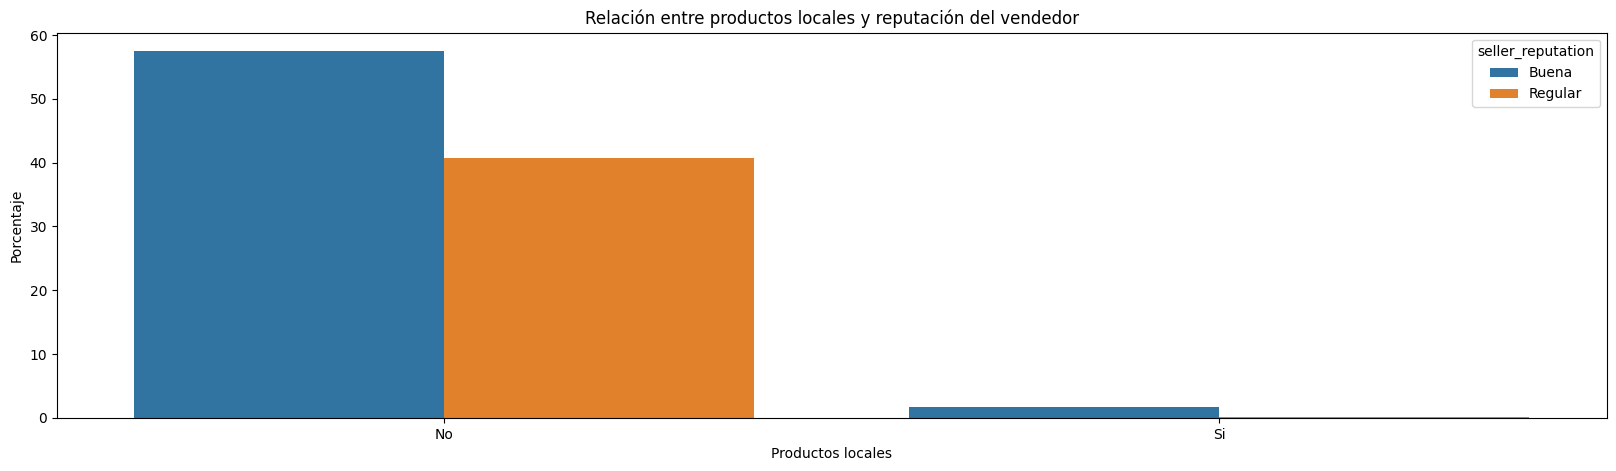

In [54]:
fig, axes = plt.subplots(figsize=(20, 5))

# Gráfico de barras para la frecuencia relativa
sns.barplot(x="badge_local_product", y='percentage', hue="seller_reputation", data=tabla_contingencia_melted3)

plt.xlabel('Productos locales')
plt.ylabel('Porcentaje')
plt.title('Relación entre productos locales y reputación del vendedor')
plt.show()

8. Calcula la media y la mediana de la variable discount_percentage. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

In [55]:
media_discount_percentage = df['discount_percentage'].mean()
print(f"La media de porcentaje de descuento es: {np.round(media_discount_percentage, 2)}")

mediana_discount_percentage = df['discount_percentage'].median()
print(f"La mediana de porcentaje de descuento es: {np.round(mediana_discount_percentage, 2)}")

La media de porcentaje de descuento es: -26.06
La mediana de porcentaje de descuento es: -5.83


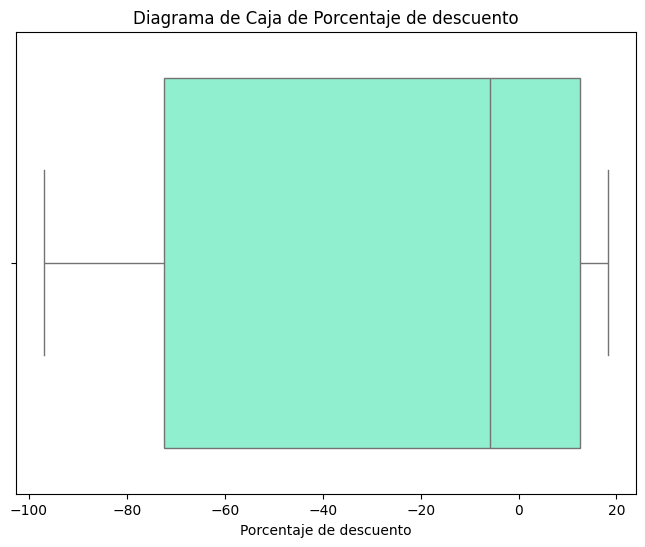

In [56]:
# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando el método boxplot visualizamos la mediana, cambiamos el color del boxplot
sns.boxplot(x='discount_percentage', 
            data=df, 
            color='aquamarine')

# cambiamos el nombre del eje x
plt.xlabel('Porcentaje de descuento')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Porcentaje de descuento');

9. Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas badge_fast_shipping y seller_reputation. ¿Qué puedes concluir sobre la distribución de las calificaciones altas?

In [57]:
tabla_contingencia4 = pd.crosstab(df["badge_fast_shipping"], df["seller_reputation"], normalize=True) * 100

# Reestructurar tabla_contingencia
tabla_contingencia_melted4 = tabla_contingencia4.reset_index().melt(
    id_vars="badge_fast_shipping",
    var_name="seller_reputation",
    value_name='percentage'
)
tabla_contingencia_melted4

,badge_fast_shipping,seller_reputation,percentage
0,No,Buena,58.169104
1,Si,Buena,1.017165
2,No,Regular,40.559441
3,Si,Regular,0.254291


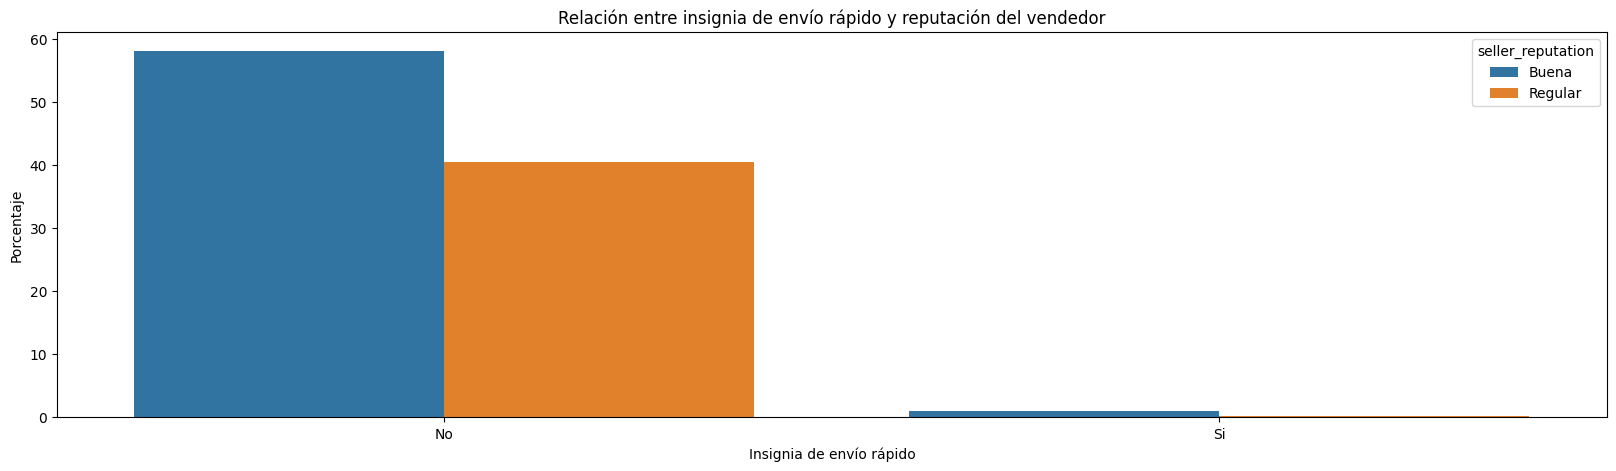

In [58]:
fig, axes = plt.subplots(figsize=(20, 5))

# Gráfico de barras para la frecuencia relativa
sns.barplot(x="badge_fast_shipping", y='percentage', hue="seller_reputation", data=tabla_contingencia_melted4)

plt.xlabel('Insignia de envío rápido')
plt.ylabel('Porcentaje')
plt.title('Relación entre insignia de envío rápido y reputación del vendedor')
plt.show()